In [1]:
import sys
sys.path.append('/Users/glebdovzhenko/Dropbox/PycharmProjects/DissertationPlots')

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mp_img
from data import tr_line_scan_idx, axial_force_length_idx, img_dir, fcp_dir, scans_2d_dir
from utilities import read_gsas_strain_csv, young, poisson
import os

%matplotlib inline
textwidth = 390.  # pt
plt.rcParams['figure.figsize'] = (textwidth / 72., textwidth / 72. * 9. / 16.)  # inches
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Computer Modern Sans serif'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['text.usetex'] = True

e_params_al = (young['Al6082'], poisson['Al6082'])
e_params_ti = (young['Ti64'], poisson['Ti64'])

scale_ti = (-45, 45, -300, 500)
scale_al = (-45, 45, -150, 220)
scale_temp = (-10, 20, 0, 400)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sxl, syl, szl = '$\sigma_x$', '$\sigma_y$', '$\sigma_z$'
pxl, pyl, pzl = 'Distance from weld center $x$ [mm]', 'Distance from depos. start $y$ [mm]', 'Substrate depth $z$ [mm]'
stress_l = 'Residual stress $\sigma$ [MPa]'
stress_l_x = 'Transverse RS $\sigma _x$ [MPa]'
stress_l_y = 'Longitudinal RS $\sigma _y$ [MPa]'

plot_prefix = 'FSRSTI'
plot_wd = '/Users/glebdovzhenko/Dropbox/Apps/Overleaf/THESIS/pictures/'

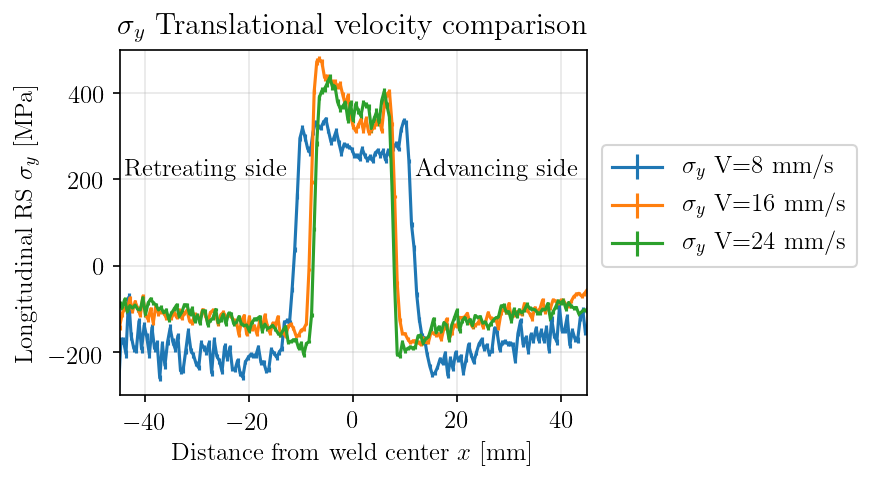

In [8]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 8, 2, 'Cu', False, False], {2: e_params_ti})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 16, 2, 'Cu', False, False], {2: e_params_ti})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 24, 2, 'Cu', False, False], {2: e_params_ti})
data1.index += 4
data2.index += 4
data3.index += 4

fig = plt.figure()

plt.title(syl + ' Translational velocity comparison')
plt.xlabel(pxl)
plt.ylabel(stress_l_y)
plt.errorbar(data1.index, data1['2;s22'], yerr=data1['esd-2;s22'], label=syl+' V=8 mm/s')
plt.errorbar(data2.index, data2['2;s22'], yerr=data2['esd-2;s22'], label=syl+' V=16 mm/s')
plt.errorbar(data3.index, data3['2;s22'], yerr=data3['esd-2;s22'], label=syl+' V=24 mm/s')
# plt.errorbar(data1.index, data1['2;s11'], yerr=data1['esd-2;s11'], label=sxl+' V=8 mm/s')
# plt.errorbar(data2.index, data2['2;s11'], yerr=data2['esd-2;s11'], label=sxl+' V=16 mm/s')
# plt.errorbar(data3.index, data3['2;s11'], yerr=data3['esd-2;s11'], label=sxl+' V=24 mm/s')

plt.text(12, 210, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-44, 210, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis(scale_ti)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.07, 0.6))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'stress_ti_sy.png'), 
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

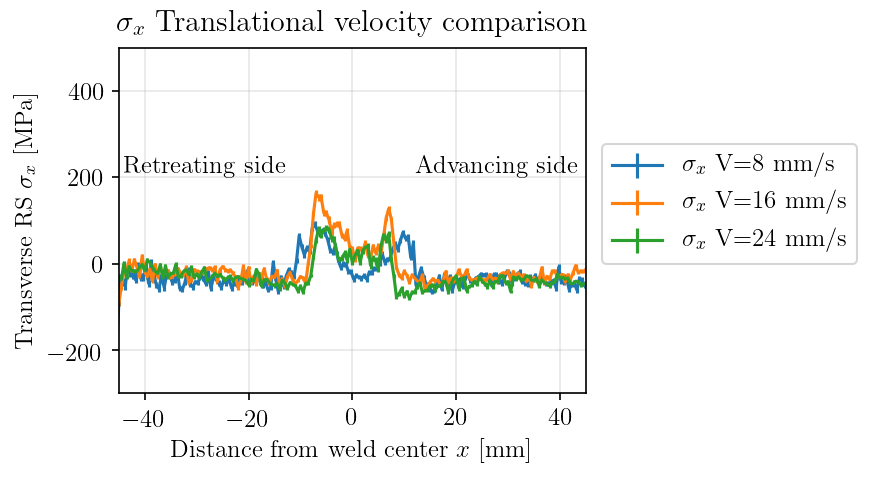

In [9]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 8, 2, 'Cu', False, False], {2: e_params_ti})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 16, 2, 'Cu', False, False], {2: e_params_ti})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 24, 2, 'Cu', False, False], {2: e_params_ti})
data1.index += 4
data2.index += 4
data3.index += 4

fig = plt.figure()

plt.title(sxl + ' Translational velocity comparison')
plt.xlabel(pxl)
plt.ylabel(stress_l_x)
# plt.errorbar(data1.index, data1['2;s22'], yerr=data1['esd-2;s22'], label=syl+' V=8 mm/s')
# plt.errorbar(data2.index, data2['2;s22'], yerr=data2['esd-2;s22'], label=syl+' V=16 mm/s')
# plt.errorbar(data3.index, data3['2;s22'], yerr=data3['esd-2;s22'], label=syl+' V=24 mm/s')
plt.errorbar(data1.index, data1['2;s11'], yerr=data1['esd-2;s11'], label=sxl+' V=8 mm/s')
plt.errorbar(data2.index, data2['2;s11'], yerr=data2['esd-2;s11'], label=sxl+' V=16 mm/s')
plt.errorbar(data3.index, data3['2;s11'], yerr=data3['esd-2;s11'], label=sxl+' V=24 mm/s')

plt.text(12, 210, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-44, 210, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis(scale_ti)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.07, 0.6))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'stress_ti_sx.png'), 
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

54.44247915508511
18.530575400202146


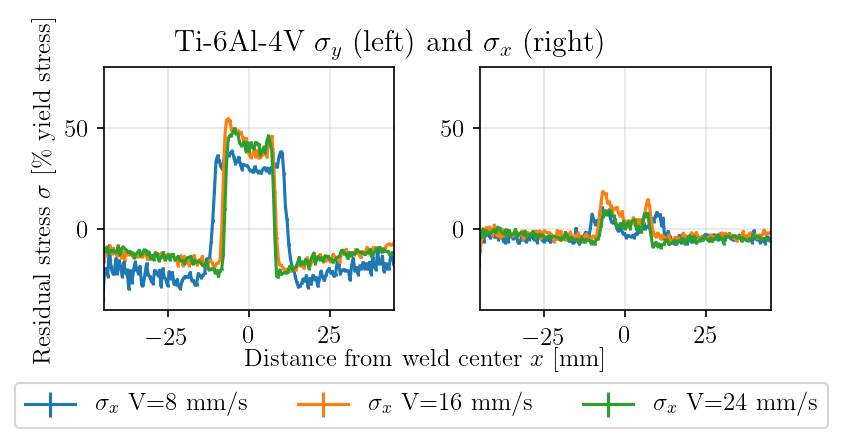

In [10]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 8, 2, 'Cu', False, False], {2: e_params_ti})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 16, 2, 'Cu', False, False], {2: e_params_ti})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 24, 2, 'Cu', False, False], {2: e_params_ti})
data1.index += 4
data2.index += 4
data3.index += 4

fig = plt.figure(figsize=(plt.rcParams['figure.figsize'][0], 0.9 * plt.rcParams['figure.figsize'][1]))

fig.suptitle('Ti-6Al-4V ' + syl + ' (left) and ' + sxl + ' (right)')
plt.subplot(121)
# plt.xlabel(pxl)
plt.ylabel(stress_l[:-5] + '[\% yield stress]')
plt.errorbar(data1.index, data1['2;s22'] / 8.80, yerr=data1['esd-2;s22'] / 8.80, label=syl+' V=8 mm/s')
plt.errorbar(data2.index, data2['2;s22'] / 8.80, yerr=data2['esd-2;s22'] / 8.80, label=syl+' V=16 mm/s')
plt.errorbar(data3.index, data3['2;s22'] / 8.80, yerr=data3['esd-2;s22'] / 8.80, label=syl+' V=24 mm/s')
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis(scale_ti[:2] + (-40, 80))
print(data2['2;s22'].max() / 8.80)

plt.subplot(122)
# plt.xlabel(pxl)
# plt.ylabel(stress_l)
plt.errorbar(data1.index, data1['2;s11'] / 8.80, yerr=data1['esd-2;s11'] / 8.80, label=sxl+' V=8 mm/s')
plt.errorbar(data2.index, data2['2;s11'] / 8.80, yerr=data2['esd-2;s11'] / 8.80, label=sxl+' V=16 mm/s')
plt.errorbar(data3.index, data3['2;s11'] / 8.80, yerr=data3['esd-2;s11'] / 8.80, label=sxl+' V=24 mm/s')
print(data2['2;s11'].max() / 8.80)
# plt.text(12, 0.2, 'Advancing side', size=plt.rcParams['font.size'])

# plt.text(-44, 0.2, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis(scale_ti[:2] + (-40, 80))

plt.tight_layout()
fig.subplots_adjust(top=0.89, bottom=0.3)
leg = plt.legend(loc=9, bbox_to_anchor=(-0.2, -0.25), ncol=3)
fig.text(0.32, 0.18, pxl, va='center')

plt.savefig(os.path.join(plot_wd, 'CONCL_' + 'stress_ti_sx_sy_yield.png'), 
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

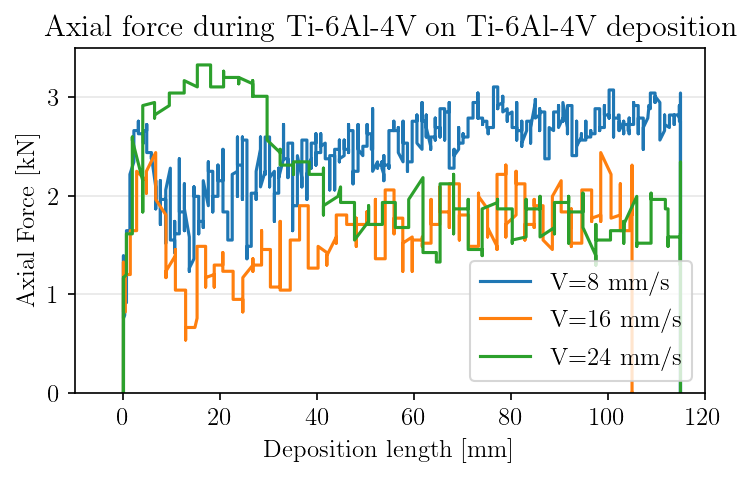

In [11]:
f1 = pd.read_csv(axial_force_length_idx['Ti64', 8, 2, 'Cu', False, False], header=None)
f2 = pd.read_csv(axial_force_length_idx['Ti64', 16, 2, 'Cu', False, False], header=None)
f3 = pd.read_csv(axial_force_length_idx['Ti64', 24, 2, 'Cu', False, False], header=None)
plt.figure()
plt.plot(f1[1], 1E-3 * f1[0], label='V=8 mm/s')
plt.plot(f2[1], 1E-3 * f2[0], label='V=16 mm/s')
plt.plot(f3[1], 1E-3 * f3[0], label='V=24 mm/s')
plt.xlabel('Deposition length [mm]')
plt.ylabel('Axial Force [kN]')
plt.title('Axial force during Ti-6Al-4V on Ti-6Al-4V deposition')
plt.grid(which='both', axis='y', alpha=0.3)
plt.legend()

plt.axis((-10, 120, 0, 3.5))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'force_length.png'), bbox_inches="tight", pad_inches=0.1)

/Users/glebdovzhenko/anaconda3/envs/DissertationPlots/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


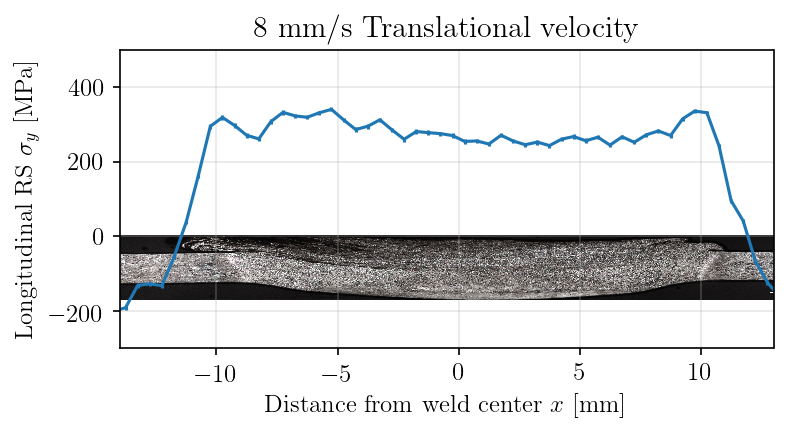

In [12]:
mic22 = mp_img.imread(os.path.join(img_dir, 'weld21_8mms.jpg'))

data1 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 8, 2, 'Cu', False, False], {2: e_params_ti})
data1.index += 4

plt.figure()
# plt.title('Ti-6Al-4V on Ti-6Al-4V, 2mm thick substrate')
plt.title('8 mm/s Translational velocity')
plt.xlabel(pxl)
plt.ylabel(stress_l_y)
plt.grid(which='both', axis='both', alpha=0.3)
plt.imshow(mic22, extent=[-14, 15, -800 * mic22.shape[0] / mic22.shape[1] * 4 / 3, 0])
plt.errorbar(data1.index, data1['2;s22'], yerr=data1['esd-2;s22'], label=syl+' V=8 mm/s')

plt.axis((-14, 13) + scale_ti[2:])
plt.axes().set_aspect('auto')

plt.tight_layout()

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 's_mic_8.png'), bbox_inches="tight", pad_inches=0.1)

/Users/glebdovzhenko/anaconda3/envs/DissertationPlots/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


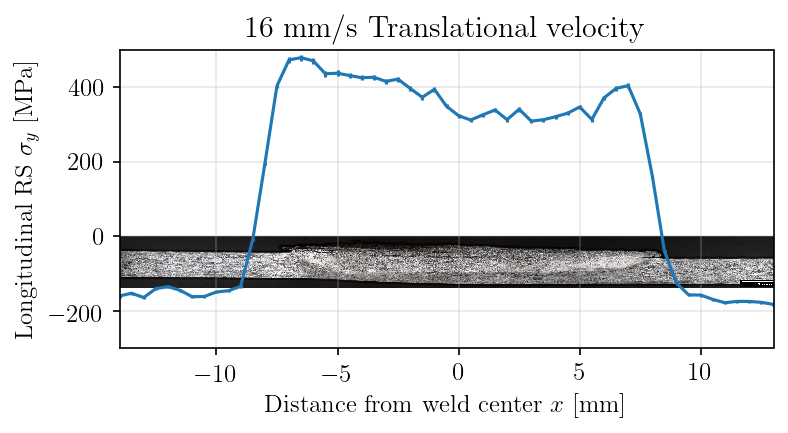

In [13]:
mic22 = mp_img.imread(os.path.join(img_dir, 'weld9_16mms.jpg'))

data1 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 16, 2, 'Cu', False, False], {2: e_params_ti})
data1.index += 4

plt.figure()
plt.title('16 mm/s Translational velocity')
plt.xlabel(pxl)
plt.ylabel(stress_l_y)
plt.imshow(mic22, extent=[-14, 15, -800 * mic22.shape[0] / mic22.shape[1] * 4 / 3, 0])
plt.errorbar(data1.index, data1['2;s22'], yerr=data1['esd-2;s22'], label=syl+' V=16 mm/s')
# plt.plot((0, 0), (-400, 600), '--', label=None)
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis((-14, 13) + scale_ti[2:])
# plt.legend()
plt.axes().set_aspect('auto')

plt.tight_layout()

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 's_mic_16.png'), bbox_inches="tight", pad_inches=0.1)

/Users/glebdovzhenko/anaconda3/envs/DissertationPlots/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


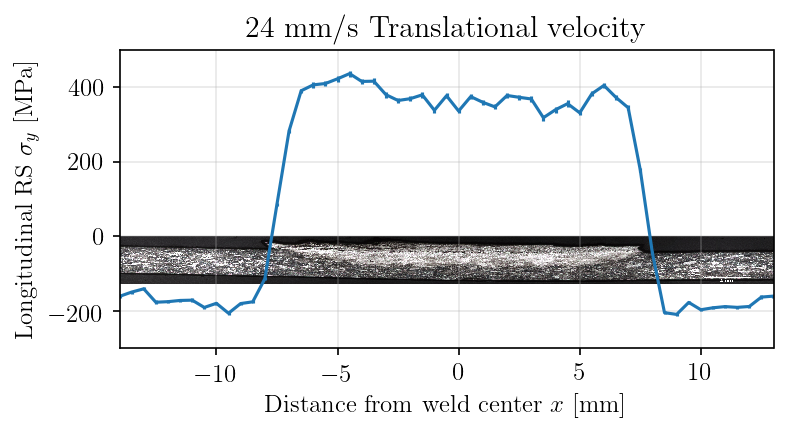

In [14]:
mic19 = mp_img.imread(os.path.join(img_dir, 'weld19_24mms.jpg'))

data3 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 24, 2, 'Cu', False, False], {2: e_params_ti})
data3.index += 4


plt.figure()
plt.title('24 mm/s Translational velocity')
plt.xlabel(pxl)
plt.ylabel(stress_l_y)
plt.imshow(mic19, extent=[-15.5, 13.5, -800 * mic19.shape[0] / mic19.shape[1] * 4 / 3, 0])
plt.errorbar(data3.index, data3['2;s22'], yerr=data3['esd-2;s22'], label=syl+' V=24 mm/s')

plt.grid(which='both', axis='both', alpha=0.3)
plt.axis((-14, 13) + scale_ti[2:])
plt.axes().set_aspect('auto')

plt.tight_layout()

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 's_mic_24.png'), bbox_inches="tight", pad_inches=0.1)

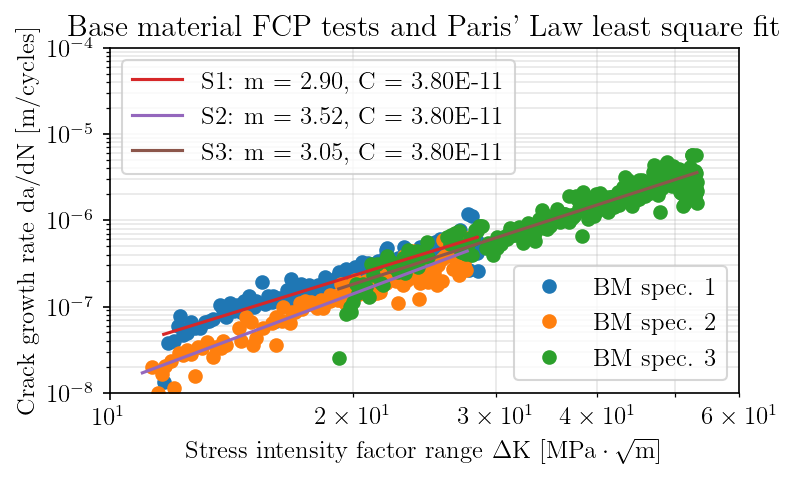

In [15]:
s1 = pd.read_csv(os.path.join(fcp_dir, 'bm1.csv'), sep=',', header=None)
s2 = pd.read_csv(os.path.join(fcp_dir, 'bm2.csv'), sep=',', header=None)
s3 = pd.read_csv(os.path.join(fcp_dir, 'bm3.csv'), sep=',', header=None)

fat_x1, fat_y1 = np.log(s1[0]), np.log(s1[1])
fat_x2, fat_y2 = np.log(s2[0]), np.log(s2[1])
fat_x3, fat_y3 = np.log(s3[0]), np.log(s3[1])

fat_x1, fat_y1 = fat_x1[~(np.isnan(fat_x1) | np.isnan(fat_y1))], fat_y1[~(np.isnan(fat_x1) | np.isnan(fat_y1))]
fat_x2, fat_y2 = fat_x2[~(np.isnan(fat_x2) | np.isnan(fat_y2))], fat_y2[~(np.isnan(fat_x2) | np.isnan(fat_y2))]
fat_x3, fat_y3 = fat_x3[~(np.isnan(fat_x3) | np.isnan(fat_y3))], fat_y3[~(np.isnan(fat_x3) | np.isnan(fat_y3))]

fat_p1 = np.polyfit(fat_x1, fat_y1, 1)
fat_p2 = np.polyfit(fat_x2, fat_y2, 1)
fat_p3 = np.polyfit(fat_x3, fat_y3, 1)

fat_fit1 = np.polyval(fat_p1, np.log(s1[0]))
fat_fit2 = np.polyval(fat_p2, np.log(s2[0]))
fat_fit3 = np.polyval(fat_p3, np.log(s3[0]))

plt.figure('fatigue_bm')
plt.title('Base material FCP tests and Paris\' Law least square fit')
plt.ylabel('Crack growth rate da/dN [m/cycles]')
plt.xlabel('Stress intensity factor range $\Delta$K [$\mathrm{MPa}\cdot\sqrt{\mathrm{m}}$]')
p1, = plt.loglog(s1[0], s1[1], 'o', label='Base mat. spec. 1')
p2, = plt.loglog(s2[0], s2[1], 'o', label='Base mat. spec. 2')
p3, = plt.loglog(s3[0], s3[1], 'o', label='Base mat. spec. 3')
p4, = plt.loglog(s1[0], np.exp(fat_fit1), '-', label='S1: m = %0.2f, C = %0.2E' % (fat_p1[0], np.exp(fat_p1[1])))
p5, = plt.loglog(s2[0], np.exp(fat_fit2), '-', label='S2: m = %0.2f, C = %0.2E' % (fat_p2[0], np.exp(fat_p1[1])))
p6, = plt.loglog(s3[0], np.exp(fat_fit3), '-', label='S3: m = %0.2f, C = %0.2E' % (fat_p3[0], np.exp(fat_p1[1])))
plt.axis((10, 60, 1E-8, 1E-4))

l1 = plt.legend([p1, p2, p3], ['BM spec. 1', 'BM spec. 2', 'BM spec. 3'], loc=4)
l2 = plt.legend([p4, p5, p6], ['S1: m = %0.2f, C = %0.2E' % (fat_p1[0], np.exp(fat_p1[1])),
                               'S2: m = %0.2f, C = %0.2E' % (fat_p2[0], np.exp(fat_p1[1])),
                               'S3: m = %0.2f, C = %0.2E' % (fat_p3[0], np.exp(fat_p1[1]))], loc=0)
plt.grid(which='both', axis='both', alpha=0.3)
plt.gca().add_artist(l1)
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'paris.png'), 
            additional_artists=[l1, l2], bbox_inches="tight", pad_inches=0.1)

/Users/glebdovzhenko/anaconda3/envs/DissertationPlots/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


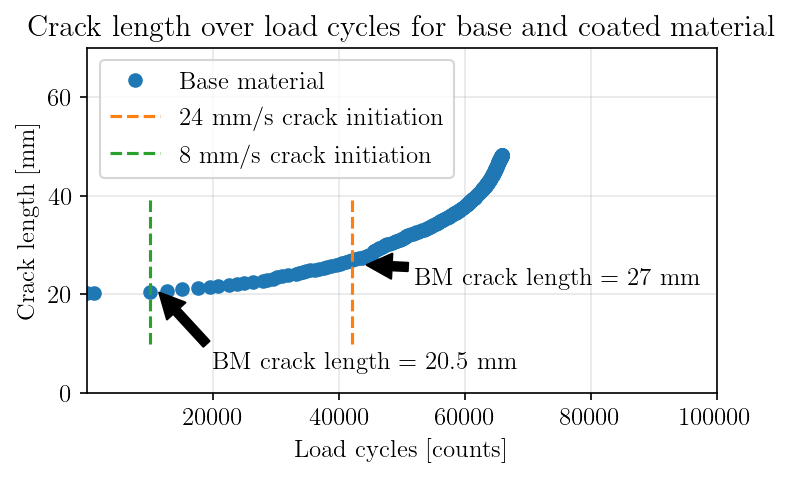

In [16]:
s4 = pd.read_csv(os.path.join(fcp_dir, 'bm3_lc.csv'), sep=',', header=None)

fig = plt.figure()
plt.title('Crack length over load cycles for base and coated material')
plt.ylabel('Crack length [mm]')
plt.xlabel('Load cycles [counts]')
ax = fig.add_subplot(111)
ax.plot(s4[0], s4[1], 'o', label='Base material')
ax.plot((4.2E4, 4.2E4), (10, 40), '--', label='24 mm/s crack initiation')
ax.plot((1.0E4, 1.0E4), (10, 40), '--', label='8 mm/s crack initiation')
ax.annotate('BM crack length = 27 mm', xy=(4.4E4, 26), xytext=(5.2E4, 22),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('BM crack length = 20.5 mm', xy=(1.1E4, 21), xytext=(2.0E4, 5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.axis((1E1, 1E5, 0, 70))
plt.legend(loc=2)
plt.grid(which='both', axis='both', alpha=0.3)
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'cr_init.png'), 
            bbox_inches="tight", pad_inches=0.1)

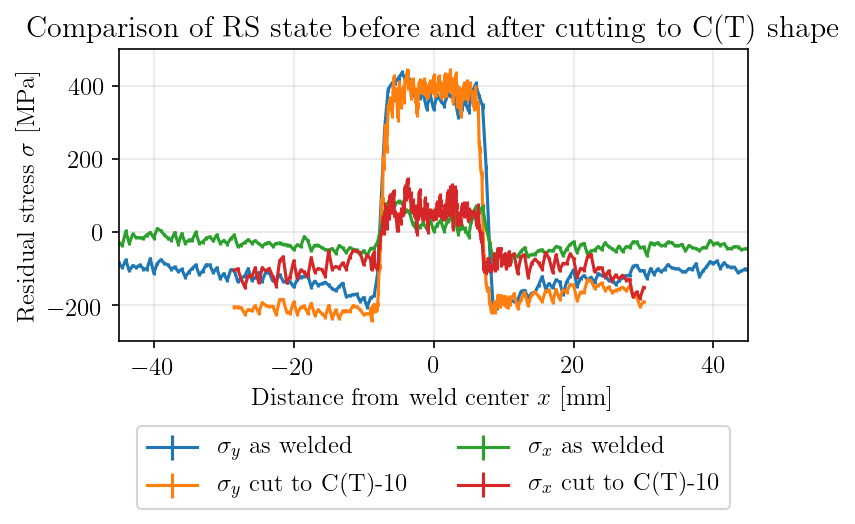

In [17]:
data3 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 24, 2, 'Cu', False, False], {2: e_params_ti})
data4 = read_gsas_strain_csv(tr_line_scan_idx['Ti64', 24, 2, 'Cu', False, True], {2: e_params_ti})
data3.index += 4

fig = plt.figure(figsize=(plt.rcParams['figure.figsize'][0], 1.1 * plt.rcParams['figure.figsize'][1]))

plt.title('Comparison of RS state before and after cutting to C(T) shape')
plt.xlabel(pxl)
plt.ylabel(stress_l)

plt.errorbar(data3.index, data3['2;s22'], yerr=data3['esd-2;s22'], label=syl+' as welded')
plt.errorbar(data4.index, data4['2;s22'], yerr=data4['esd-2;s22'], label=syl+' cut to C(T)-10')

plt.errorbar(data3.index, data3['2;s11'], yerr=data3['esd-2;s11'], label=sxl+' as welded')
plt.errorbar(data4.index, data4['2;s11'] - 60, yerr=data4['esd-2;s11'], label=sxl+' cut to C(T)-10')

plt.grid(which='both', axis='both', alpha=0.3)
plt.axis(scale_ti)
plt.legend()
ax.text(18, 200, 'Advancing side', size=12)
ax.text(-40, 200, 'Retreating side', size=12)

fig.subplots_adjust(bottom=0.3)
leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'ct_cut_cmp.png'), 
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

60 76


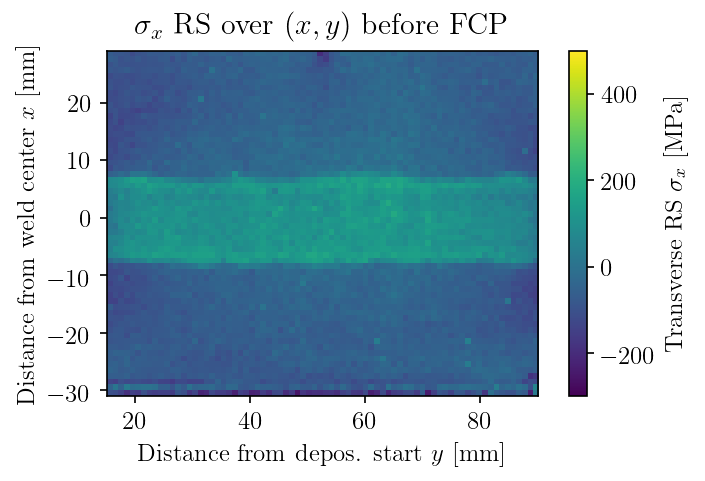

In [18]:
d = read_gsas_strain_csv(os.path.join(scans_2d_dir, '19Ti64_2D.csv'), {2: e_params_ti})
true_ind = pd.read_csv(os.path.join(scans_2d_dir, '19Ti64_2D_true_ind.csv'), index_col=0, header=None, 
                       names=['True index'])

d.set_index('name', inplace=True)
d = pd.concat((d, true_ind), axis=1)
d.set_index('True index', inplace=True)

d = d.reindex(np.arange(true_ind.min().min(), true_ind.max().max() + 1), method='nearest', fill_value=np.NaN)
d.interpolate(method='nearest', inplace=True)

step = 60
print(step, d.shape[0] // step)

plt.figure()
plt.title(sxl + ' RS over $(x,y)$ before FCP')
plt.xlabel(pyl)
plt.ylabel(pxl)
plt.imshow(np.array(d['2;s22']).reshape((step, d.shape[0] // step)), aspect=1, interpolation='nearest', origin='lower', 
           vmin=scale_ti[2], vmax=scale_ti[3], extent=(15, 90, -31, 29))
sx_over_xy_before = np.array(d['2;s22']).reshape((step, d.shape[0] // step)).copy()
cb = plt.colorbar()
cb.set_label(stress_l_x)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sx.png'), 
            bbox_inches="tight", pad_inches=0.1)

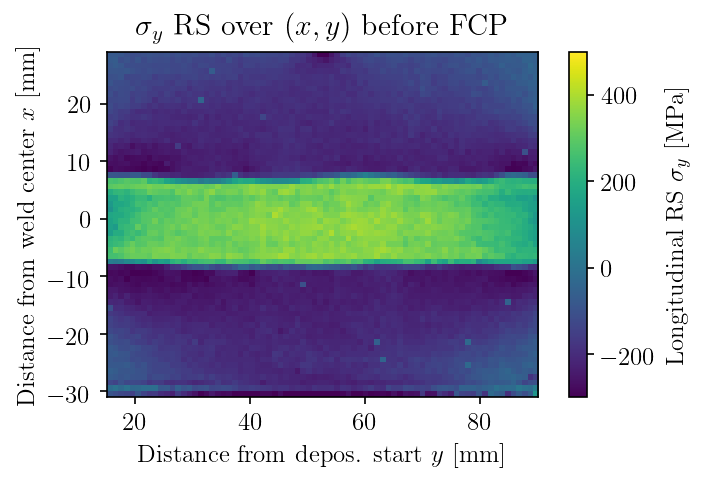

In [19]:
plt.figure()
plt.title(syl + ' RS over $(x,y)$ before FCP')
plt.xlabel(pyl)
plt.ylabel(pxl)
plt.imshow(np.array(d['2;s11']).reshape((step, d.shape[0] // step)), aspect=1, interpolation='nearest', origin='lower', 
           vmin=scale_ti[2], vmax=scale_ti[3], extent=(15, 90, -31, 29))
sy_over_xy_before = np.array(d['2;s11']).reshape((step, d.shape[0] // step)).copy()
cb = plt.colorbar()
cb.set_label(stress_l_y)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sy.png'), 
            bbox_inches="tight", pad_inches=0.1)

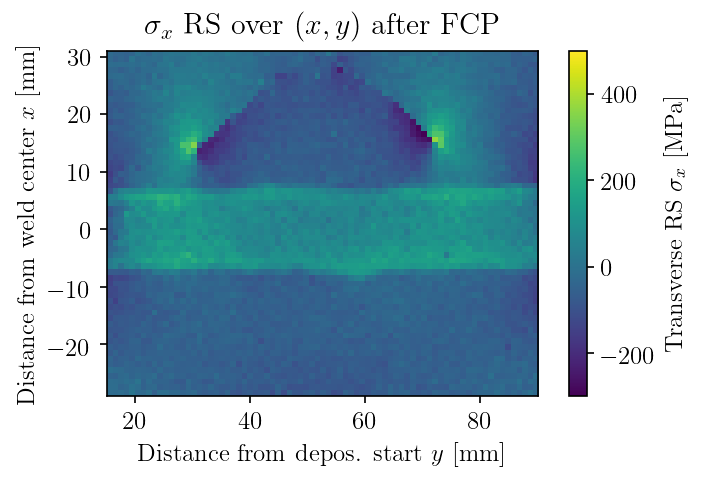

In [20]:
d = read_gsas_strain_csv(os.path.join(scans_2d_dir, '19Ti64_2D_cracked.csv'), {2: e_params_ti})
true_ind = pd.read_csv(os.path.join(scans_2d_dir, '19Ti64_2D_cracked_true_ind.csv'), index_col=0, header=None, 
                       names=['True index'])

d.set_index('name', inplace=True)
d = pd.concat((d, true_ind), axis=1)
d.set_index('True index', inplace=True)

d = d.reindex(np.arange(true_ind.min().min(), true_ind.max().max() + 1), method='nearest', fill_value=np.NaN)
d.interpolate(method='nearest', inplace=True)

step = 60

plt.figure()
plt.title(sxl + ' RS over $(x,y)$ after FCP')
plt.xlabel(pyl)
plt.ylabel(pxl)
plt.imshow(np.array(d['2;s22']).reshape((step, d.shape[0] // step)), aspect=1, interpolation='nearest', origin='lower', 
           vmin=scale_ti[2], vmax=scale_ti[3], extent=(15, 90, -29, 31))
sx_over_xy_after = np.array(d['2;s22']).reshape((step, d.shape[0] // step)).copy()
cb = plt.colorbar()
cb.set_label(stress_l_x)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sx_cracked.png'), 
            bbox_inches="tight", pad_inches=0.1)

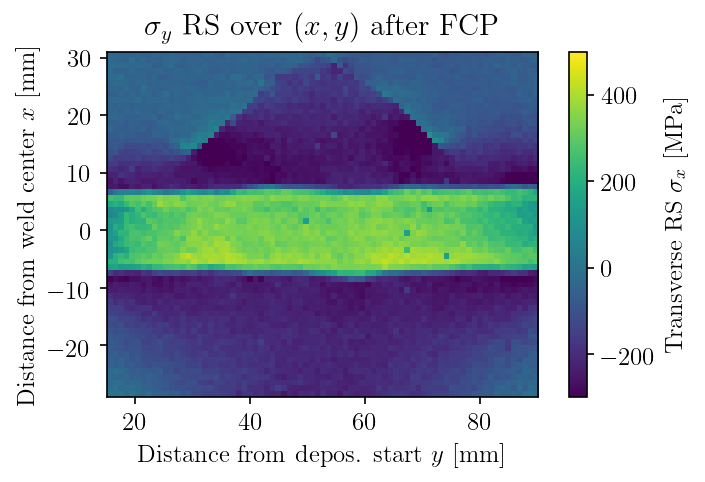

In [21]:
plt.figure()
plt.title(syl + ' RS over $(x,y)$ after FCP')
plt.xlabel(pyl)
plt.ylabel(pxl)
plt.imshow(np.array(d['2;s11']).reshape((step, d.shape[0] // step)), aspect=1, interpolation='nearest', origin='lower', 
           vmin=scale_ti[2], vmax=scale_ti[3], extent=(15, 90, -29, 31))
sy_over_xy_after = np.array(d['2;s11']).reshape((step, d.shape[0] // step)).copy()
cb = plt.colorbar()
cb.set_label(stress_l_x)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sy_cracked.png'), bbox_inches="tight", pad_inches=0.1)

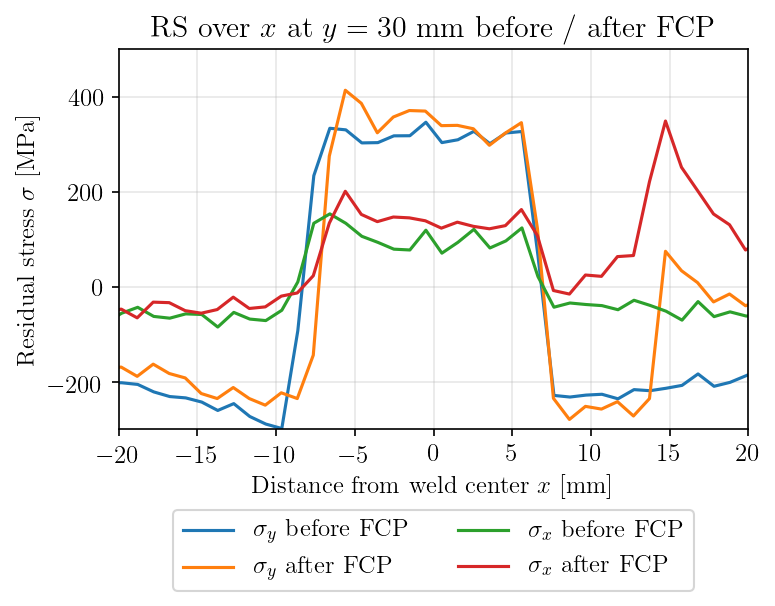

In [22]:
line = 15

fig = plt.figure(figsize=(plt.rcParams['figure.figsize'][0], 1.1 * plt.rcParams['figure.figsize'][1]))
plt.title('RS over $x$ at $y=30$ mm before / after FCP')
plt.plot(np.linspace(-31, 29, sy_over_xy_before.shape[0]), sy_over_xy_before[:, line], label=syl+' before FCP')
plt.plot(np.linspace(-29, 31, sy_over_xy_after.shape[0]), sy_over_xy_after[:, line], label=syl+' after FCP')
plt.plot(np.linspace(-31, 29, sx_over_xy_before.shape[0]), sx_over_xy_before[:, line], label=sxl+' before FCP')
plt.plot(np.linspace(-29, 31, sx_over_xy_after.shape[0]), sx_over_xy_after[:, line], label=sxl+' after FCP')

plt.grid(which='both', axis='both', alpha=0.3)
plt.axis((-20, 20) + scale_ti[2:])
plt.xlabel(pxl)
plt.ylabel(stress_l)

leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sxsy_line.png'), 
            bbox_inches="tight", pad_inches=0.1)

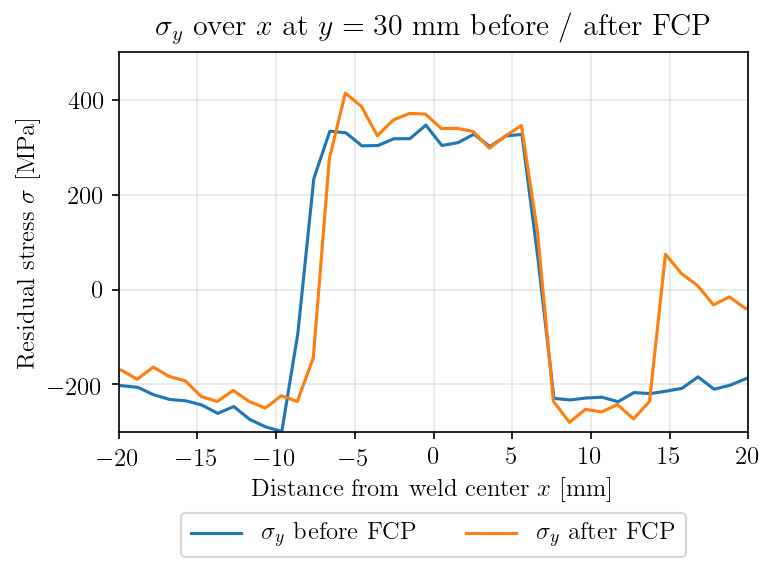

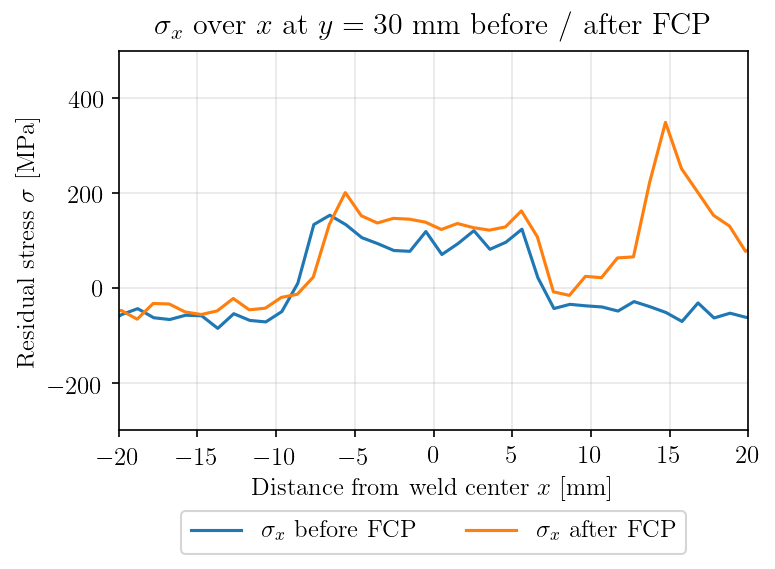

In [23]:
line = 15

fig = plt.figure(figsize=(plt.rcParams['figure.figsize'][0], 1.1 * plt.rcParams['figure.figsize'][1]))
plt.title(syl + ' over $x$ at $y=30$ mm before / after FCP')
plt.plot(np.linspace(-31, 29, sy_over_xy_before.shape[0]), sy_over_xy_before[:, line], label=syl+' before FCP')
plt.plot(np.linspace(-29, 31, sy_over_xy_after.shape[0]), sy_over_xy_after[:, line], label=syl+' after FCP')
# plt.plot(np.linspace(-31, 29, sx_over_xy_before.shape[0]), sx_over_xy_before[:, line], label=sxl+' before FCP')
# plt.plot(np.linspace(-29, 31, sx_over_xy_after.shape[0]), sx_over_xy_after[:, line], label=sxl+' after FCP')

plt.grid(which='both', axis='both', alpha=0.3)
plt.axis((-20, 20) + scale_ti[2:])
plt.xlabel(pxl)
plt.ylabel(stress_l)

leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sy_line.png'), 
            bbox_inches="tight", pad_inches=0.1)

fig = plt.figure(figsize=(plt.rcParams['figure.figsize'][0], 1.1 * plt.rcParams['figure.figsize'][1]))
plt.title(sxl + ' over $x$ at $y=30$ mm before / after FCP')
# plt.plot(np.linspace(-31, 29, sy_over_xy_before.shape[0]), sy_over_xy_before[:, line], label=syl+' before FCP')
# plt.plot(np.linspace(-29, 31, sy_over_xy_after.shape[0]), sy_over_xy_after[:, line], label=syl+' after FCP')
plt.plot(np.linspace(-31, 29, sx_over_xy_before.shape[0]), sx_over_xy_before[:, line], label=sxl+' before FCP')
plt.plot(np.linspace(-29, 31, sx_over_xy_after.shape[0]), sx_over_xy_after[:, line], label=sxl+' after FCP')

plt.grid(which='both', axis='both', alpha=0.3)
plt.axis((-20, 20) + scale_ti[2:])
plt.xlabel(pxl)
plt.ylabel(stress_l)

leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sx_line.png'), 
            bbox_inches="tight", pad_inches=0.1)

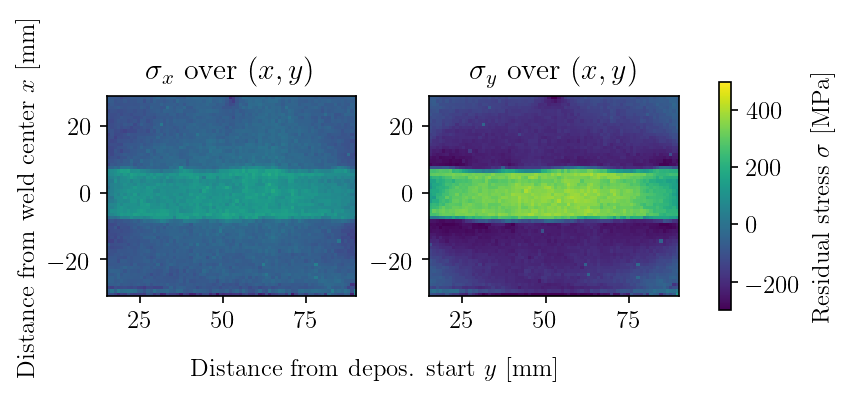

In [24]:
d = read_gsas_strain_csv(os.path.join(scans_2d_dir, '19Ti64_2D.csv'), {2: e_params_ti})
true_ind = pd.read_csv(os.path.join(scans_2d_dir, '19Ti64_2D_true_ind.csv'), index_col=0, header=None, 
                       names=['True index'])

d.set_index('name', inplace=True)
d = pd.concat((d, true_ind), axis=1)
d.set_index('True index', inplace=True)

d = d.reindex(np.arange(true_ind.min().min(), true_ind.max().max() + 1), method='nearest', fill_value=np.NaN)
d.interpolate(method='nearest', inplace=True)

step = 60

fig = plt.figure()
plt.subplot(121)
plt.title(sxl + ' over $(x,y)$')
# plt.xlabel(pyl)
plt.ylabel(pxl)
plt.imshow(np.array(d['2;s22']).reshape((step, d.shape[0] // step)), aspect=1, interpolation='nearest', origin='lower', 
           vmin=scale_ti[2], vmax=scale_ti[3], extent=(15, 90, -31, 29))

plt.subplot(122)
plt.title(syl + ' over $(x,y)$')
# plt.xlabel(pyl)
fig.text(0.25, 0.12, pyl, va='center')
im = plt.imshow(np.array(d['2;s11']).reshape((step, d.shape[0] // step)), aspect=1, interpolation='nearest', 
                origin='lower', 
           vmin=scale_ti[2], vmax=scale_ti[3], extent=(15, 90, -31, 29))
plt.tight_layout()

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.25, 0.015, 0.5])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(stress_l)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sx_sy.png'), 
            bbox_inches="tight", pad_inches=0.1)

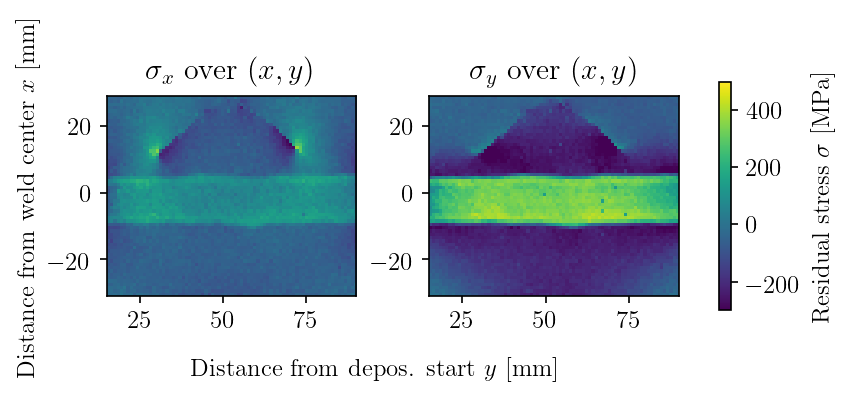

In [25]:
d = read_gsas_strain_csv(os.path.join(scans_2d_dir, '19Ti64_2D_cracked.csv'), {2: e_params_ti})
true_ind = pd.read_csv(os.path.join(scans_2d_dir, '19Ti64_2D_cracked_true_ind.csv'), index_col=0, header=None, 
                       names=['True index'])

d.set_index('name', inplace=True)
d = pd.concat((d, true_ind), axis=1)
d.set_index('True index', inplace=True)

d = d.reindex(np.arange(true_ind.min().min(), true_ind.max().max() + 1), method='nearest', fill_value=np.NaN)
d.interpolate(method='nearest', inplace=True)

step = 60

fig = plt.figure()
plt.subplot(121)
plt.title(sxl + ' over $(x,y)$')
# plt.xlabel(pyl)
plt.ylabel(pxl)
plt.imshow(np.array(d['2;s22']).reshape((step, d.shape[0] // step)), aspect=1, interpolation='nearest', origin='lower', 
           vmin=scale_ti[2], vmax=scale_ti[3], extent=(15, 90, -31, 29))

plt.subplot(122)
plt.title(syl + ' over $(x,y)$')
# plt.xlabel(pyl)
fig.text(0.25, 0.12, pyl, va='center')
im = plt.imshow(np.array(d['2;s11']).reshape((step, d.shape[0] // step)), aspect=1, interpolation='nearest', 
                origin='lower', 
           vmin=scale_ti[2], vmax=scale_ti[3], extent=(15, 90, -31, 29))
plt.tight_layout()

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.25, 0.015, 0.5])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(stress_l)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sx_sy_cracked.png'), 
            bbox_inches="tight", pad_inches=0.1)